## Étape 1 : Chargement du fichier

In [1]:

import pandas as pd

# Chargement du fichier CSV
df = pd.read_csv('diabetes.csv')

# Aperçu des premières lignes
print(df.head())

# Aperçu des informations générales
print(df.info())


   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768

## Étape 2 : Nettoyage et prétraitement

In [2]:

import numpy as np

# Liste des colonnes à corriger (zéros invalides)
cols_with_zero_invalid = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Remplacer les zéros par NaN
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].replace(0, np.nan)

# Imputation par la médiane
df[cols_with_zero_invalid] = df[cols_with_zero_invalid].fillna(df[cols_with_zero_invalid].median())


## Étape 3 : Analyse exploratoire des données (EDA)

Matplotlib is building the font cache; this may take a moment.


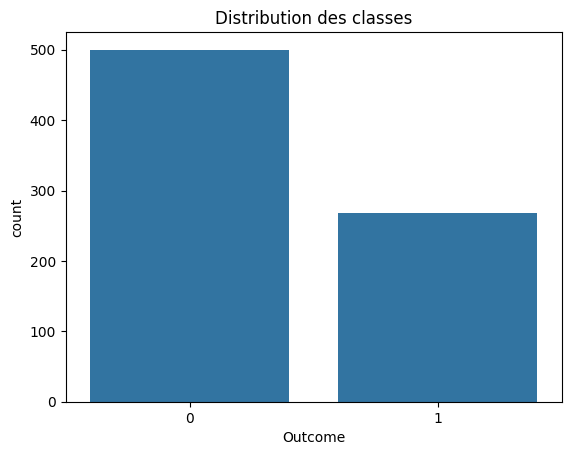

        Pregnancies                                                Glucose  \
              count      mean       std  min   25%  50%  75%   max   count   
Outcome                                                                      
0             500.0  3.298000  3.017185  0.0  1.00  2.0  5.0  13.0   500.0   
1             268.0  4.865672  3.741239  0.0  1.75  4.0  8.0  17.0   268.0   

                     ... DiabetesPedigreeFunction           Age             \
               mean  ...                      75%    max  count       mean   
Outcome              ...                                                     
0        110.682000  ...                  0.56175  2.329  500.0  31.190000   
1        142.130597  ...                  0.72800  2.420  268.0  37.067164   

                                                  
               std   min   25%   50%   75%   max  
Outcome                                           
0        11.667655  21.0  23.0  27.0  37.0  81.0  
1        10.96

In [3]:

import seaborn as sns
import matplotlib.pyplot as plt

# Barplot distribution étiquette
sns.countplot(data=df, x='Outcome')
plt.title("Distribution des classes")
plt.show()

# Statistiques descriptives par classe
print(df.groupby('Outcome').describe())


## Étape 4 : Séparation des données

In [4]:

from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split train + temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Split temp => validation et test
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)


## Étape 5 : Normalisation des features

In [5]:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)


## Étape 6-7 : Modélisation - Régression Logistique

In [6]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model = LogisticRegression(class_weight='balanced', random_state=42)
model.fit(X_train_scaled, y_train)

y_val_pred = model.predict(X_val_scaled)

print("Accuracy:", accuracy_score(y_val, y_val_pred))
print("Precision:", precision_score(y_val, y_val_pred))
print("Recall:", recall_score(y_val, y_val_pred))
print("F1 Score:", f1_score(y_val, y_val_pred))


Accuracy: 0.7792207792207793
Precision: 0.6612903225806451
Recall: 0.7592592592592593
F1 Score: 0.7068965517241379


## Étape 8 : Évaluation finale sur le test set

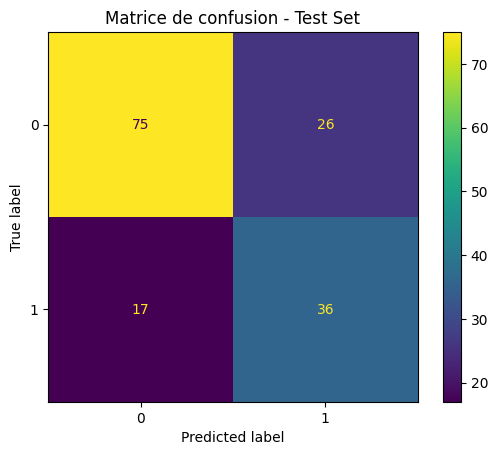

In [7]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_test_pred = model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Matrice de confusion - Test Set")
plt.show()


## Étape 9 : Interprétabilité et analyse d'erreurs

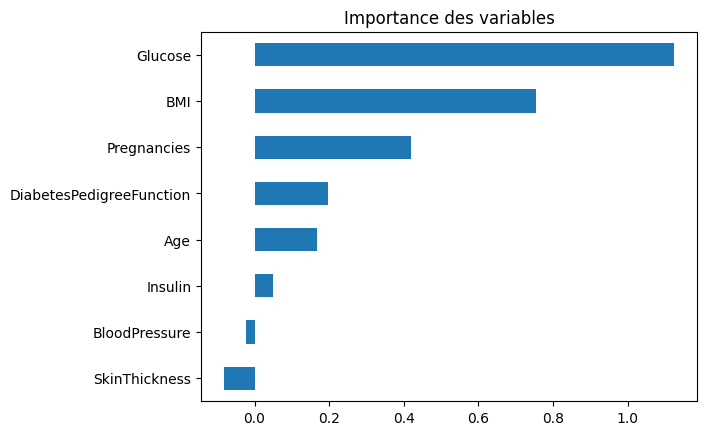

Faux positifs: 26, Faux négatifs: 17


In [8]:

# Importance des features
importance = pd.Series(model.coef_[0], index=X.columns)
importance.sort_values().plot(kind='barh', title="Importance des variables")
plt.show()

# Faux positifs / faux négatifs
fp = ((y_test_pred == 1) & (y_test == 0)).sum()
fn = ((y_test_pred == 0) & (y_test == 1)).sum()
print(f"Faux positifs: {fp}, Faux négatifs: {fn}")


## Étape 10 : Conclusion
Le modèle de régression logistique fournit des résultats satisfaisants sur ce dataset. Des pistes d'amélioration incluent l'essai de modèles plus avancés (Random Forest, XGBoost), la collecte de données plus équilibrées, et l'ajout de techniques d'interprétabilité supplémentaires.